# Lesson 2: SPICE and SpiceyPy

## What is SPICE?

SPICE (Spacecraft, Planet, Instrument, C-matrix, and Event) files are a standard format used in the space science community to represent geometric and positional information about celestial bodies, spacecraft, instruments, and events in a mission or observation. 

Categories of data included in the SPICE format are as follows:

`Ephemeris Data`: positions and velocities of celestial bodies

`Coordinate Systems`: different coordinate systems used in the mission (ie. spacecraft-relative, planetocentric, etc)

`Instrument Geometry`: geometric characteristics of spacecraft instruments (ie. field of view, focal length, etc)

`Event Times`: timestamps related to significant mission events

![https://res.cloudinary.com/tbmg/c_scale,w_400,f_auto,q_auto/v1545822191/sites/tb/articles/sup/STB/2010/briefs/NPO-47017.jpg](https://res.cloudinary.com/tbmg/c_scale,w_400,f_auto,q_auto/v1545822191/sites/tb/articles/sup/STB/2010/briefs/NPO-47017.jpg)

[Image Source](https://www.nasa.gov/wp-content/uploads/2018/12/acton_ancillary_data_production_for_cubesats_s3vi_webinar_series_15_may_2019.pdf)

## What is SpiceyPy?
SpiceyPy is a Python wrapper for SPICE which provides Python bindings to the SPICE Toolkit (originally written in FORTRAN), allowing users to access SPICE functionality directly from Python. 
You can learn more about it on its GitHub repo here:
[https://github.com/AndrewAnnex/SpiceyPy](https://github.com/AndrewAnnex/SpiceyPy)

In [2]:
import spiceypy as spice

In [3]:
# Print out the toolkit version
spice.tkvrsn("TOOLKIT")

'CSPICE_N0067'

## Interactive Step-by-Step Visualizing Cassini Trajectory 🛰️🪐
Cassini is a spacecraft built by NASA which is an orbiter around Saturn. It carries a suite of scientific instruments designed to study Saturn's atmosphere, magnetic field, rings, and moons.

This is an explanation of the intro tutorial here:
[https://spiceypy.readthedocs.io/en/v2.3.1/exampleone.html](https://spiceypy.readthedocs.io/en/v2.3.1/exampleone.html)

### Loading Kernels
Kernels are files containing various types of data used by the SPICE Toolkit to perform calculations and simulations related to space missions. Kernels come in different formats, such as text-based (.tls), binary (.b), and meta-kernel (.mk).

To set up our kernel environment for our project, we are going to be using the following kernels (within the kernel folder):

[https://naif.jpl.nasa.gov/pub/naif/generic_kernels/lsk/a_old_versions/naif0009.tls](https://naif.jpl.nasa.gov/pub/naif/generic_kernels/lsk/a_old_versions/naif0009.tls)

[https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/sclk/cas00084.tsc](https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/sclk/cas00084.tsc)

[https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/pck/cpck05Mar2004.tpc](https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/pck/cpck05Mar2004.tpc)

[https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/fk/release.11/cas_v37.tf](https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/fk/release.11/cas_v37.tf)

[https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/ck/04135_04171pc_psiv2.bc](https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/ck/04135_04171pc_psiv2.bc)

[https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/spk/030201AP_SK_SM546_T45.bsp](https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/spk/030201AP_SK_SM546_T45.bsp)

[https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/ik/release.11/cas_iss_v09.ti](https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/ik/release.11/cas_iss_v09.ti)

[https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/spk/020514_SE_SAT105.bsp](https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/spk/020514_SE_SAT105.bsp)

[https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/spk/981005_PLTEPH-DE405S.bsp](https://naif.jpl.nasa.gov/pub/naif/CASSINI/kernels/spk/981005_PLTEPH-DE405S.bsp)

All of the kernel specifications needed for our project, can be specified within a text file. In this case `cassMetaK.txt`.

## Reading SPICE Files
The `furnsh` function allows us to load a "meta-kernel" file named "cassMetaK.txt".

In [25]:
spice.furnsh("./kernels/cassMetaK.txt")

The below code converts date-time strings into ephemeris time (ET) values using `str2et`

In [28]:
step = 4000
# Specify dates
utc = ['Jun 20, 2004', 'Dec 1, 2005']

etOne = spice.str2et(utc[0])
etTwo = spice.str2et(utc[1])
print("Ephemeris Time One: {}, Ephemeris Time Two: {}".format(etOne, etTwo))

Ephemeris Time One: 140961664.18440723, Ephemeris Time Two: 186667264.18308285


The below code snippet generates the time values (each ET value in the list corresponds to a specific time point within the time interval defined by etOne and etTwo)

In [30]:
# Calculate time range
times = [x*(etTwo-etOne)/step + etOne for x in range(step)]

print(times[0:3])

[140961664.18440723, 140973090.5844069, 140984516.98440656]


The following uses `spkpos` to compute the positions of the Cassini spacecraft at multiple time points specified by the times variable.
The `spkpos` takes in the name of the spacecraft ('Cassini'), times, reference frame ('J2000'), aberration correction flag ('None'), and observer location ('SATURN BARYCENTER').

In [33]:
# Running spkpos
positions, lightTimes = spice.spkpos('Cassini', times, 'J2000', 'NONE', 'SATURN BARYCENTER')

# Print out Positioning (X, Y, Z)
print("Positions: ", positions[0])

# Print out Light Times
print("Light Times: ", lightTimes[0])

Positions:  [-5461446.61080924 -4434793.40785864 -1200385.93315424]
Light Times:  23.806223878250965


Clear the kernel pool to clean up memory and reset kernel state

In [12]:
spice.kclear()

## Visualizing Path Trajectory
Now, we can switch over to using matplotlib in order to plot the calculated values for positioning within a 3D graph!

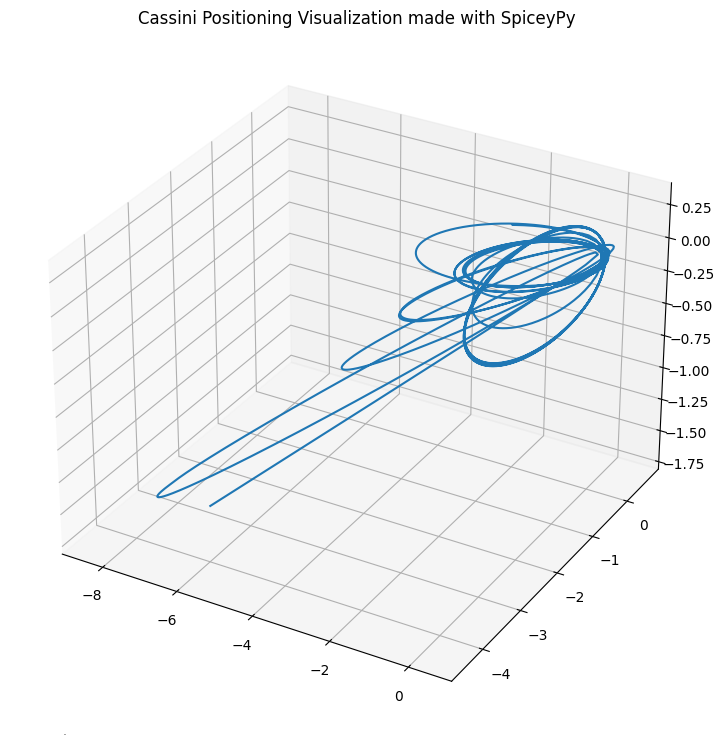

In [31]:
positions = np.asarray(positions).T # positions is a list, make it an ndarray for easier indexing
fig = plt.figure(figsize=(9, 9))
ax  = fig.add_subplot(111, projection='3d')
ax.plot(positions[0], positions[1], positions[2])
plt.title('Cassini Positioning Visualization made with SpiceyPy')
plt.show()

Starstruck? In the next lesson, we will be diving into working with a library called skyfield and how to integrate it with NASA JPL Horizons data.